✅ Veri seti başarıyla yüklendi!

🔹 Veri setinin ilk 5 satırı:
   Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                            6.3                 319    Moderate  
1                            6.0                 611    Moderate  
2                            5.2                 619    Moderate  
3                           11.1                 551        Good  
4                           12.7                 303        Good  

🔹 Veri setinin genel bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-N

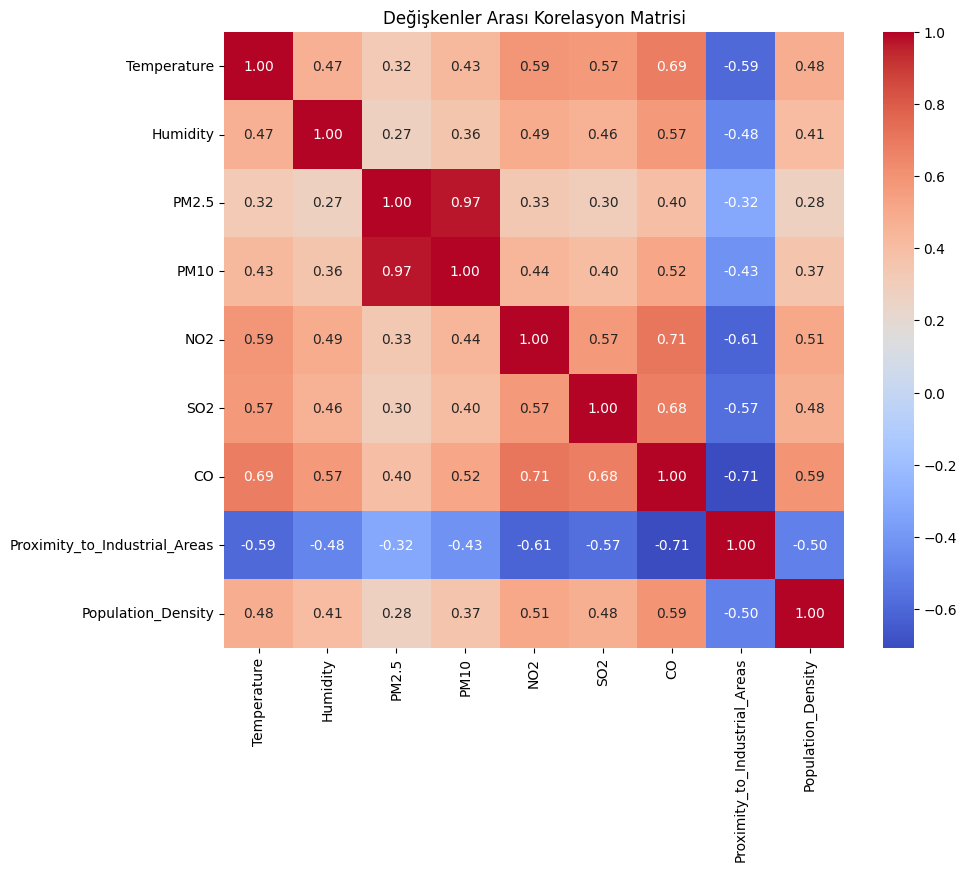


🔹 Sayısal değişkenlerde aykırı değerler için kutu grafikleri:


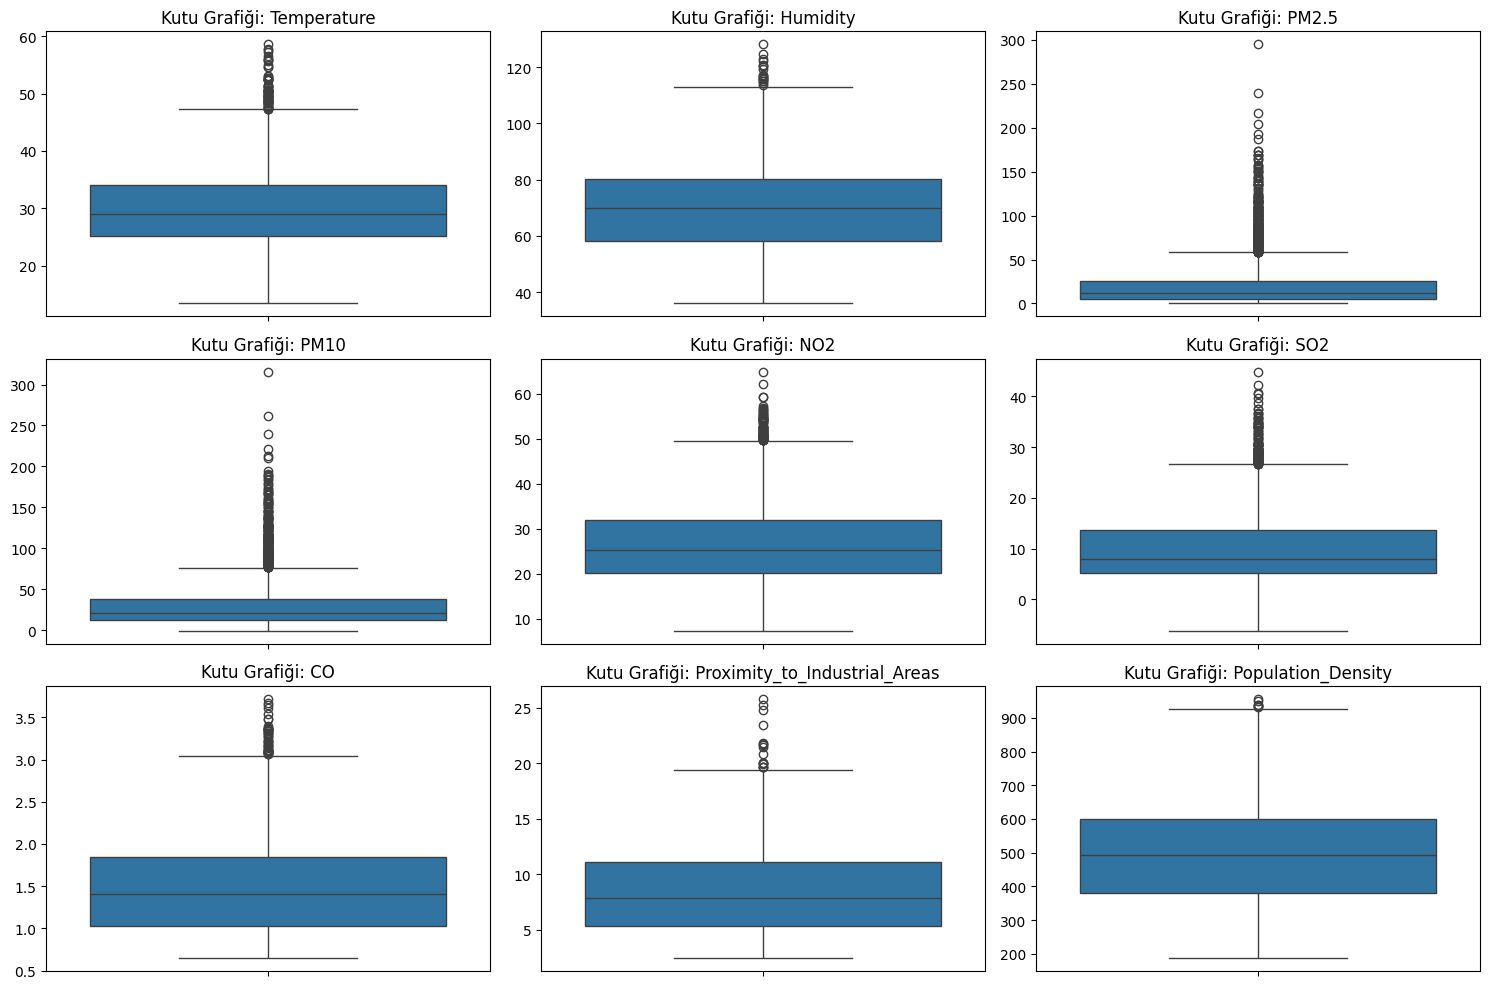


🔹 'Air Quality_Encoded' sınıf dağılımı:
Air Quality_Encoded
0    2000
2    1500
3    1000
1     500
Name: count, dtype: int64

🔹 Orijinal etiketlerin kodlama eşleşmeleri:
Good: 0
Hazardous: 1
Moderate: 2
Poor: 3

🔹 Kodlama sonrası veri setinin ilk 5 satırı:
   Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  \
0                            6.3                 319    Moderate   
1                            6.0                 611    Moderate   
2                            5.2                 619    Moderate   
3                           11.1                 551        Good   
4                           12.7              

In [1]:
# -*- coding: utf-8 -*-
# Hava Kalitesi ML Projesi - Veri Yükleme ve Ön İşleme

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

# ==============================
# 1. Veri Yükleme
# ==============================
try:
    df = pd.read_csv('air_quality_data.csv')
    print("✅ Veri seti başarıyla yüklendi!")
except FileNotFoundError:
    print("❌ Hata: 'air_quality_data.csv' dosyası bulunamadı.")
    print("Dosya yolunu veya adını kontrol edin.")

# ==============================
# 2. Veri İnceleme
# ==============================
print("\n🔹 Veri setinin ilk 5 satırı:")
print(df.head())

print("\n🔹 Veri setinin genel bilgileri:")
df.info()

print("\n🔹 Eksik değerlerin sayısı:")
print(df.isnull().sum())

print("\n🔹 Eksik değerlerin yüzde dağılımı:")
print((df.isnull().sum() / len(df)) * 100)

print("\n🔹 'Air Quality' sütununun benzersiz değerleri ve dağılımı:")
print(df['Air Quality'].value_counts())
print(df['Air Quality'].unique())

print("\n🔹 Sayısal değişkenlerin betimleyici istatistikleri:")
print(df.describe())

# ==============================
# 3. Korelasyon Analizi
# ==============================
print("\n🔹 Değişkenler arası korelasyon matrisi:")
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Değişkenler Arası Korelasyon Matrisi')
plt.show()

# ==============================
# 4. Aykırı Değer Analizi (Boxplot)
# ==============================
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
print("\n🔹 Sayısal değişkenlerde aykırı değerler için kutu grafikleri:")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Kutu Grafiği: {col}')
    plt.ylabel('')
plt.tight_layout()
plt.show()

# ==============================
# 5. Label Encoding (Hedef Değişken)
# ==============================
df_encoded = df.copy()
label_encoder = LabelEncoder()
df_encoded['Air Quality_Encoded'] = label_encoder.fit_transform(df_encoded['Air Quality'])

print("\n🔹 'Air Quality_Encoded' sınıf dağılımı:")
print(df_encoded['Air Quality_Encoded'].value_counts())

print("\n🔹 Orijinal etiketlerin kodlama eşleşmeleri:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{label}: {i}")

print("\n🔹 Kodlama sonrası veri setinin ilk 5 satırı:")
print(df_encoded.head())

df = df_encoded.copy()  # Güncel veri seti

# ==============================
# 6. Standardizasyon
# ==============================
numeric_cols_for_scaling = df.select_dtypes(include=['number']).columns.tolist()

# 'Air Quality' (kategorik) ve 'Air Quality_Encoded' (hedef) sütunlarını çıkartıyoruz
for col in ['Air Quality', 'Air Quality_Encoded']:
    if col in numeric_cols_for_scaling:
        numeric_cols_for_scaling.remove(col)

scaler = StandardScaler()
df[numeric_cols_for_scaling] = scaler.fit_transform(df[numeric_cols_for_scaling])

print("\n🔹 Standardizasyon sonrası ilk 5 satır:")
print(df[numeric_cols_for_scaling].head())

print("\n🔹 Ölçeklendirilmiş veri setinin genel bilgileri:")
df.info()


✅ Veri seti başarıyla yüklendi!
✅ Veri ön işleme tamamlandı.

--- PCA ---


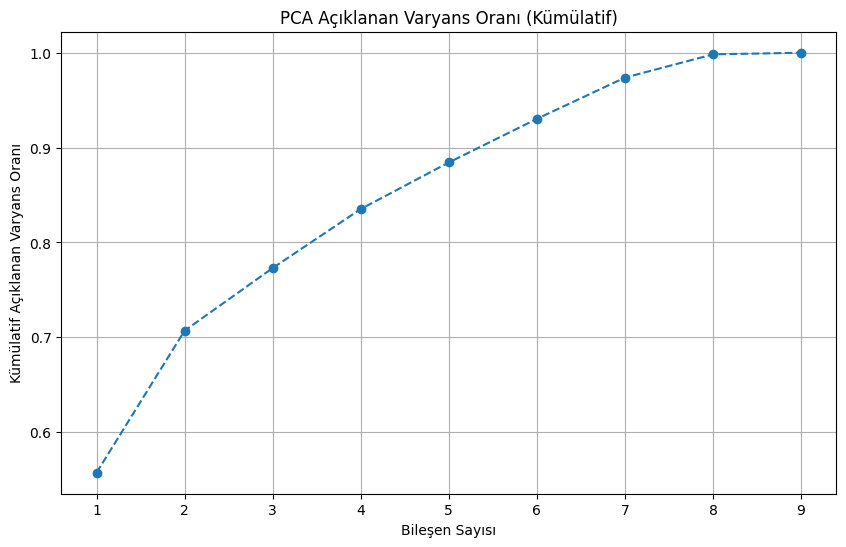

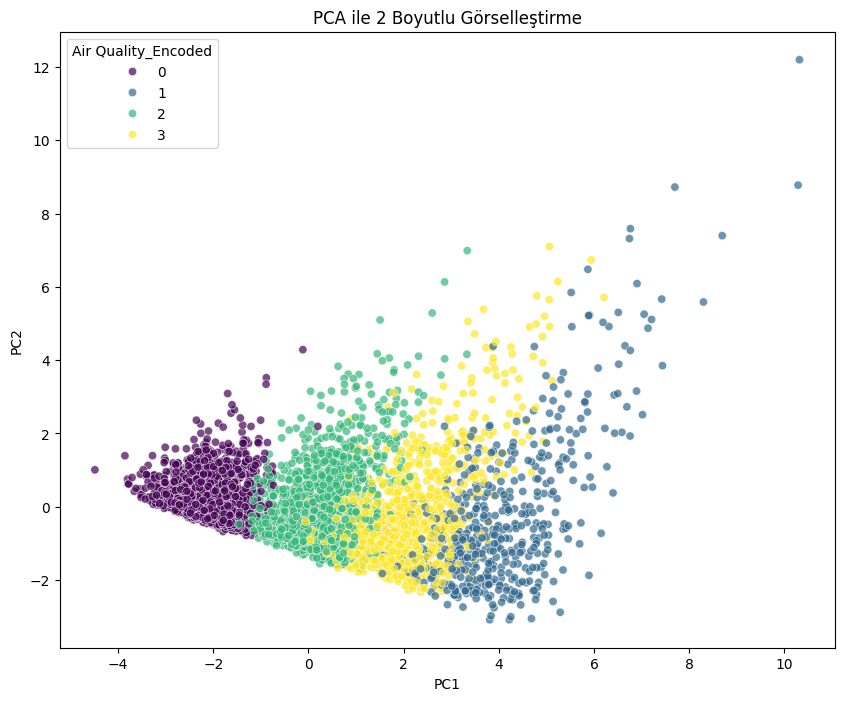


--- LDA ---


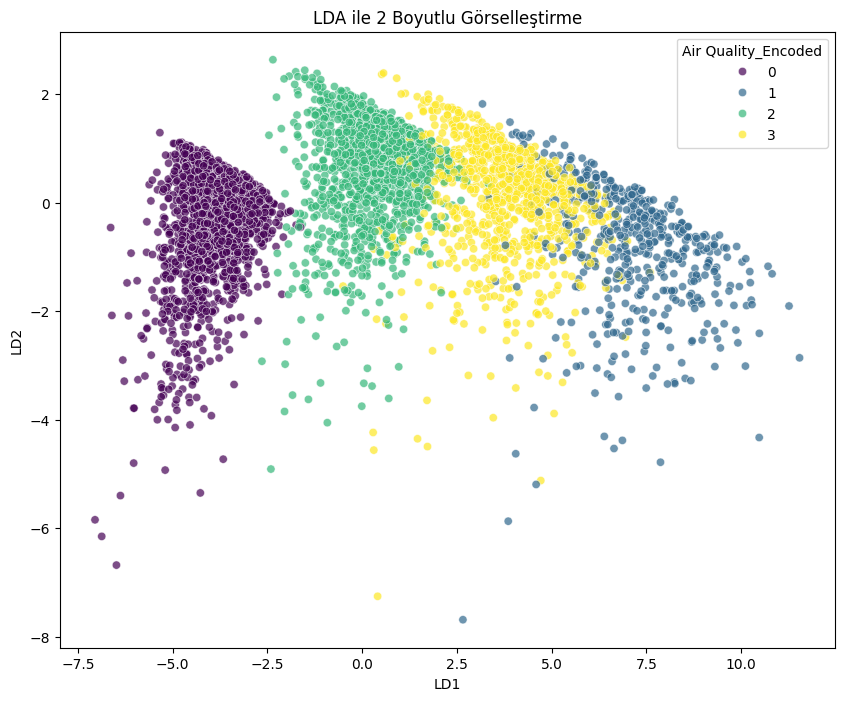


--- t-SNE ---


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


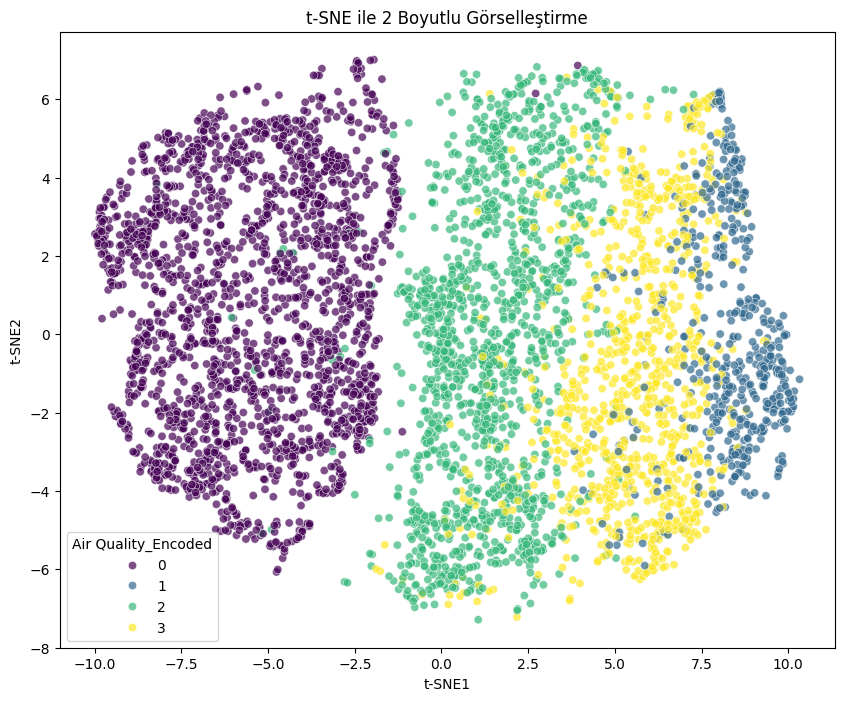

In [3]:
# -*- coding: utf-8 -*-
# Hava Kalitesi ML Projesi - Boyut İndirgeme ve Görselleştirme

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE

# ==============================
# 1. Veri Yükleme ve Ön İşleme
# ==============================
try:
    df = pd.read_csv('air_quality_data.csv')
    print("✅ Veri seti başarıyla yüklendi!")

    # Kategorik sütun kodlama
    label_encoder = LabelEncoder()
    df['Air Quality_Encoded'] = label_encoder.fit_transform(df['Air Quality'])

    # Sayısal sütunları ölçeklendirme
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
    if 'Air Quality_Encoded' in numeric_cols:
        numeric_cols.remove('Air Quality_Encoded')
    scaler = StandardScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    print("✅ Veri ön işleme tamamlandı.")
except FileNotFoundError:
    print("❌ Hata: 'air_quality_data.csv' bulunamadı.")
    exit()

# Bağımsız değişkenler (X) ve hedef değişken (y)
X = df.drop(columns=['Air Quality', 'Air Quality_Encoded'])
y = df['Air Quality_Encoded']

# ==============================
# 2. PCA (Principal Component Analysis)
# ==============================
print("\n--- PCA ---")
pca = PCA()
pca.fit(X)

# Kümülatif varyans grafiği
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(),
         marker='o', linestyle='--')
plt.title('PCA Açıklanan Varyans Oranı (Kümülatif)')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('Kümülatif Açıklanan Varyans Oranı')
plt.grid(True)
plt.show()

# Görselleştirme için 2 bileşen
pca_2d = PCA(n_components=2)
X_pca = pca_2d.fit_transform(X)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y,
                palette='viridis', legend='full', alpha=0.7)
plt.title('PCA ile 2 Boyutlu Görselleştirme')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# ==============================
# 3. LDA (Linear Discriminant Analysis)
# ==============================
print("\n--- LDA ---")
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_lda[:, 0], y=X_lda[:, 1], hue=y,
                palette='viridis', legend='full', alpha=0.7)
plt.title('LDA ile 2 Boyutlu Görselleştirme')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.show()

# ==============================
# 4. t-SNE (t-Distributed Stochastic Neighbor Embedding)
# ==============================
print("\n--- t-SNE ---")
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y,
                palette='viridis', legend='full', alpha=0.7)
plt.title('t-SNE ile 2 Boyutlu Görselleştirme')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()


✅ Veri seti başarıyla yüklendi!
✅ Veri ön işleme tamamlandı.
Eğitim seti: (3500, 9), Test seti: (1500, 9)

--- Lojistik Regresyon ---
En iyi parametreler: {'C': 10, 'penalty': 'l1'}

🔹 Lojistik Regresyon Test Accuracy: 0.8647
Sınıflandırma Raporu:
               precision    recall  f1-score   support

        Good       0.99      1.00      0.99       600
   Hazardous       0.86      0.77      0.81       150
    Moderate       0.78      0.92      0.84       450
        Poor       0.73      0.57      0.64       300

    accuracy                           0.86      1500
   macro avg       0.84      0.81      0.82      1500
weighted avg       0.86      0.86      0.86      1500



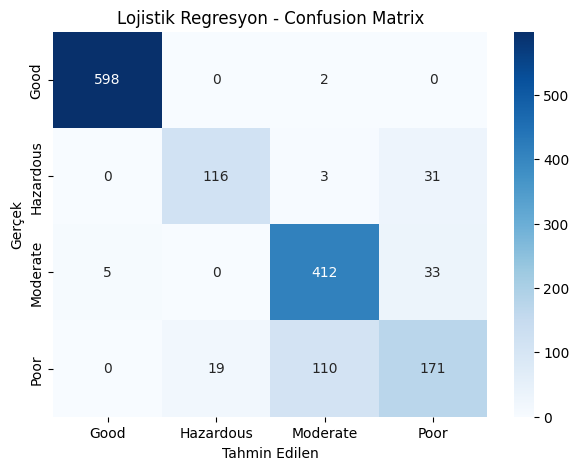


--- Karar Ağaçları ---
En iyi parametreler: {'criterion': 'gini', 'max_depth': 10}

🔹 Karar Ağaçları Test Accuracy: 0.9300
Sınıflandırma Raporu:
               precision    recall  f1-score   support

        Good       0.99      0.99      0.99       600
   Hazardous       0.84      0.75      0.79       150
    Moderate       0.94      0.96      0.95       450
        Poor       0.83      0.86      0.84       300

    accuracy                           0.93      1500
   macro avg       0.90      0.89      0.89      1500
weighted avg       0.93      0.93      0.93      1500



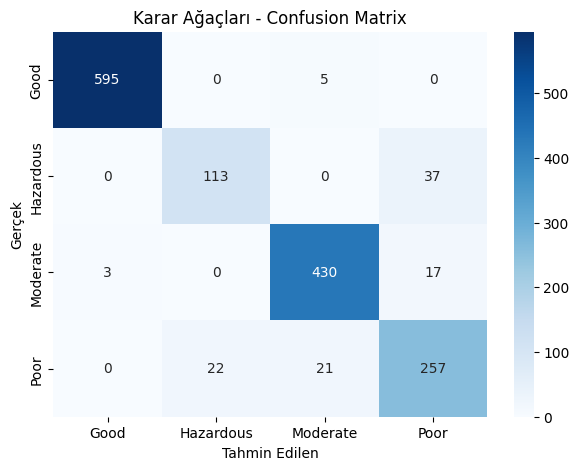


--- Rastgele Orman ---
En iyi parametreler: {'max_depth': None, 'n_estimators': 200}

🔹 Rastgele Orman Test Accuracy: 0.9480
Sınıflandırma Raporu:
               precision    recall  f1-score   support

        Good       1.00      1.00      1.00       600
   Hazardous       0.88      0.79      0.83       150
    Moderate       0.96      0.97      0.97       450
        Poor       0.86      0.89      0.88       300

    accuracy                           0.95      1500
   macro avg       0.92      0.91      0.92      1500
weighted avg       0.95      0.95      0.95      1500



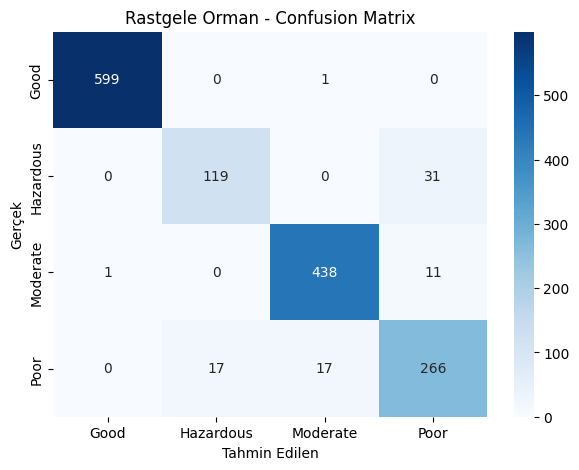


--- SVM ---
En iyi parametreler: {'C': 1, 'kernel': 'rbf'}

🔹 SVM Test Accuracy: 0.9393
Sınıflandırma Raporu:
               precision    recall  f1-score   support

        Good       1.00      1.00      1.00       600
   Hazardous       0.87      0.81      0.84       150
    Moderate       0.94      0.96      0.95       450
        Poor       0.85      0.86      0.86       300

    accuracy                           0.94      1500
   macro avg       0.92      0.91      0.91      1500
weighted avg       0.94      0.94      0.94      1500



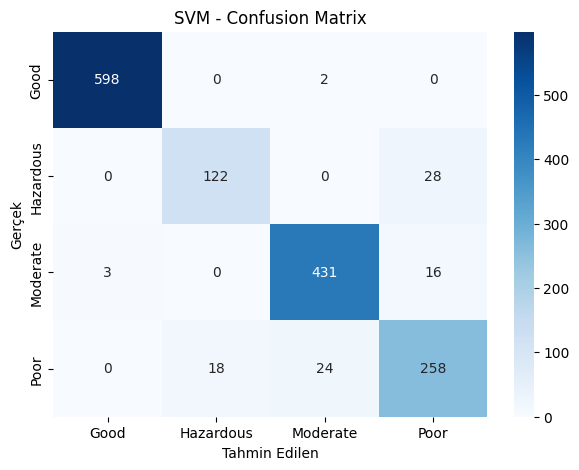


--- KNN ---
En iyi parametreler: {'n_neighbors': 7}

🔹 KNN Test Accuracy: 0.9287
Sınıflandırma Raporu:
               precision    recall  f1-score   support

        Good       0.99      1.00      0.99       600
   Hazardous       0.90      0.71      0.80       150
    Moderate       0.92      0.96      0.94       450
        Poor       0.83      0.85      0.84       300

    accuracy                           0.93      1500
   macro avg       0.91      0.88      0.89      1500
weighted avg       0.93      0.93      0.93      1500



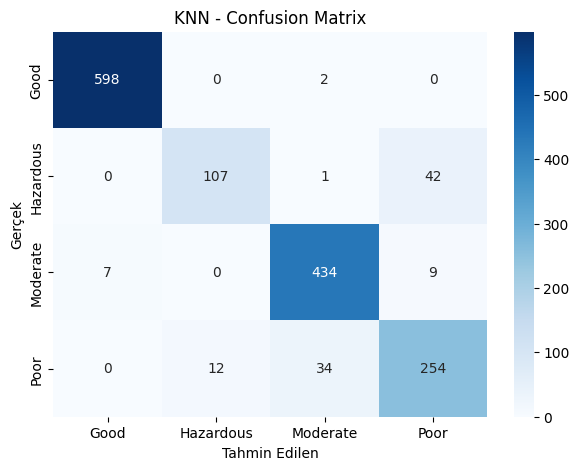

In [4]:
# -*- coding: utf-8 -*-
# Hava Kalitesi ML Projesi - Sınıflandırma Modelleri Eğitimi ve Değerlendirme

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ==============================
# 1. Veri Yükleme ve Ön İşleme
# ==============================
try:
    df = pd.read_csv('air_quality_data.csv')
    print("✅ Veri seti başarıyla yüklendi!")

    label_encoder = LabelEncoder()
    df['Air Quality_Encoded'] = label_encoder.fit_transform(df['Air Quality'])

    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
    if 'Air Quality_Encoded' in numeric_cols:
        numeric_cols.remove('Air Quality_Encoded')
    scaler = StandardScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

    print("✅ Veri ön işleme tamamlandı.")
except FileNotFoundError:
    print("❌ Hata: 'air_quality_data.csv' bulunamadı.")
    exit()

# Bağımsız değişkenler ve hedef değişken
X = df.drop(columns=['Air Quality', 'Air Quality_Encoded'])
y = df['Air Quality_Encoded']

# Eğitim/Test ayrımı
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print(f"Eğitim seti: {X_train.shape}, Test seti: {X_test.shape}")

# ==============================
# 2. Yardımcı Fonksiyon
# ==============================
def evaluate_model(model, X_test, y_test, model_name):
    """Model tahminlerini değerlendir ve confusion matrix görselleştir."""
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n🔹 {model_name} Test Accuracy: {acc:.4f}")
    print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Tahmin Edilen')
    plt.ylabel('Gerçek')
    plt.show()

# ==============================
# 3. Lojistik Regresyon
# ==============================
print("\n--- Lojistik Regresyon ---")
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
param_grid = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_log_reg = grid_search.best_estimator_
print("En iyi parametreler:", grid_search.best_params_)
evaluate_model(best_log_reg, X_test, y_test, "Lojistik Regresyon")

# ==============================
# 4. Karar Ağaçları
# ==============================
print("\n--- Karar Ağaçları ---")
tree_clf = DecisionTreeClassifier(random_state=42)
param_grid = {'max_depth': [3, 5, 10, None], 'criterion': ['gini', 'entropy']}
grid_search = GridSearchCV(tree_clf, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_tree = grid_search.best_estimator_
print("En iyi parametreler:", grid_search.best_params_)
evaluate_model(best_tree, X_test, y_test, "Karar Ağaçları")

# ==============================
# 5. Rastgele Orman
# ==============================
print("\n--- Rastgele Orman ---")
rf_clf = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, None]}
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
print("En iyi parametreler:", grid_search.best_params_)
evaluate_model(best_rf, X_test, y_test, "Rastgele Orman")

# ==============================
# 6. Destek Vektör Makineleri (SVM)
# ==============================
print("\n--- SVM ---")
svm_clf = SVC(random_state=42, probability=True)
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(svm_clf, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_svm = grid_search.best_estimator_
print("En iyi parametreler:", grid_search.best_params_)
evaluate_model(best_svm, X_test, y_test, "SVM")

# ==============================
# 7. K-En Yakın Komşular (KNN)
# ==============================
print("\n--- KNN ---")
knn_clf = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_knn = grid_search.best_estimator_
print("En iyi parametreler:", grid_search.best_params_)
evaluate_model(best_knn, X_test, y_test, "KNN")


✅ Veri seti başarıyla yüklendi!
✅ Veri ön işleme tamamlandı.

--- K-Means Dirsek Yöntemi ---


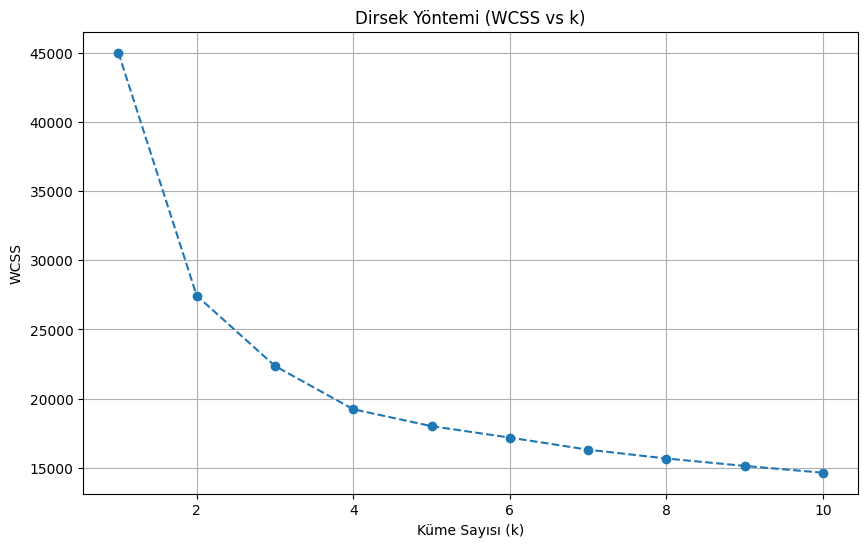


--- K-Means Kümeleme ---


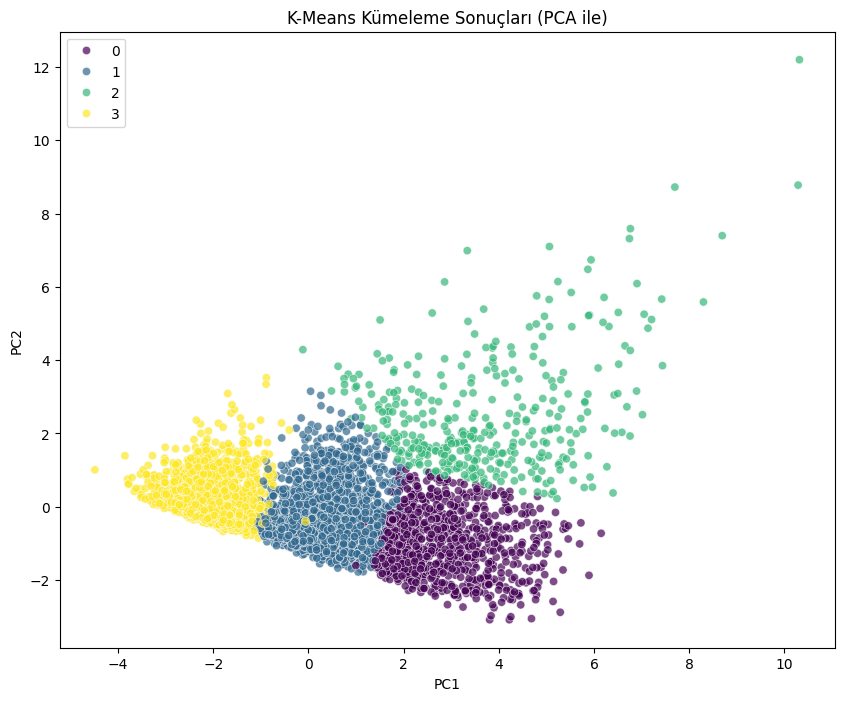


--- DBSCAN Kümeleme ---


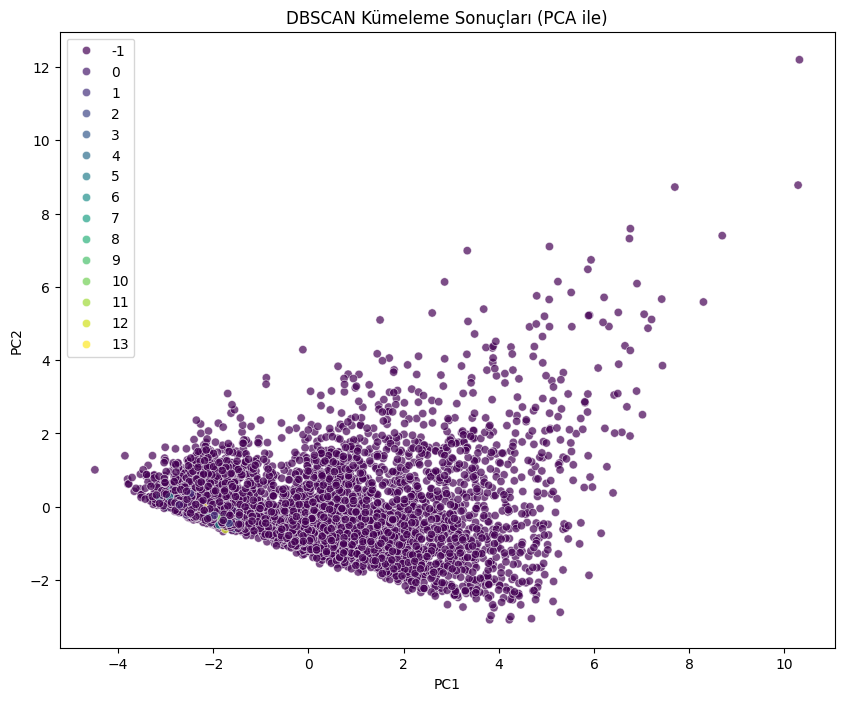


--- Kümeleme Sonuçları Karşılaştırma ---

K-Means Çapraz Tablo:
 K-Means Kümeleri    0     1    2     3
Gerçek Sınıflar                       
0                   0     2    1  1997
1                 366     3  131     0
2                   5  1361   64    70
3                 539   290  170     1

DBSCAN Çapraz Tablo:
 DBSCAN Kümeleri   -1    0    1    2    3    4    5    6    7    8    9    10  \
Gerçek Sınıflar                                                                
0                1871   17   12   29    9    5   12    7    6    6    5    5   
1                 500    0    0    0    0    0    0    0    0    0    0    0   
2                1500    0    0    0    0    0    0    0    0    0    0    0   
3                1000    0    0    0    0    0    0    0    0    0    0    0   

DBSCAN Kümeleri   11   12   13  
Gerçek Sınıflar                 
0                  5    5    6  
1                  0    0    0  
2                  0    0    0  
3                  0    0    0 

In [5]:
# -*- coding: utf-8 -*-
# Hava Kalitesi ML Projesi - Kümeleme Analizi ve Görselleştirme

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

# ==============================
# 1. Veri Yükleme ve Ön İşleme
# ==============================
try:
    df = pd.read_csv('air_quality_data.csv')
    print("✅ Veri seti başarıyla yüklendi!")

    # Etiket kodlama
    label_encoder = LabelEncoder()
    df['Air Quality_Encoded'] = label_encoder.fit_transform(df['Air Quality'])

    # Ölçeklendirme
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
    if 'Air Quality_Encoded' in numeric_cols:
        numeric_cols.remove('Air Quality_Encoded')
    scaler = StandardScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

    print("✅ Veri ön işleme tamamlandı.")
except FileNotFoundError:
    print("❌ Hata: 'air_quality_data.csv' bulunamadı.")
    exit()

X = df.drop(columns=['Air Quality', 'Air Quality_Encoded'])

# ==============================
# 2. K-Means - Dirsek Yöntemi
# ==============================
print("\n--- K-Means Dirsek Yöntemi ---")
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++',
                    max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Dirsek Yöntemi (WCSS vs k)')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# ==============================
# 3. K-Means (k=4) ve Görselleştirme
# ==============================
print("\n--- K-Means Kümeleme ---")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=4, init='k-means++',
                max_iter=300, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels,
                palette='viridis', legend='full', alpha=0.7)
plt.title('K-Means Kümeleme Sonuçları (PCA ile)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# ==============================
# 4. DBSCAN Kümeleme
# ==============================
print("\n--- DBSCAN Kümeleme ---")
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=dbscan_labels,
                palette='viridis', legend='full', alpha=0.7)
plt.title('DBSCAN Kümeleme Sonuçları (PCA ile)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# ==============================
# 5. Kümeleme Sonuçları ile Gerçek Sınıfları Karşılaştırma
# ==============================
print("\n--- Kümeleme Sonuçları Karşılaştırma ---")
kmeans_crosstab = pd.crosstab(df['Air Quality_Encoded'], kmeans_labels,
                              rownames=['Gerçek Sınıflar'], colnames=['K-Means Kümeleri'])
print("\nK-Means Çapraz Tablo:\n", kmeans_crosstab)

dbscan_crosstab = pd.crosstab(df['Air Quality_Encoded'], dbscan_labels,
                              rownames=['Gerçek Sınıflar'], colnames=['DBSCAN Kümeleri'])
print("\nDBSCAN Çapraz Tablo:\n", dbscan_crosstab)


✅ Veri seti başarıyla yüklendi!
✅ Veri ön işleme tamamlandı.

--- Rastgele Orman ROC Eğrisi ---


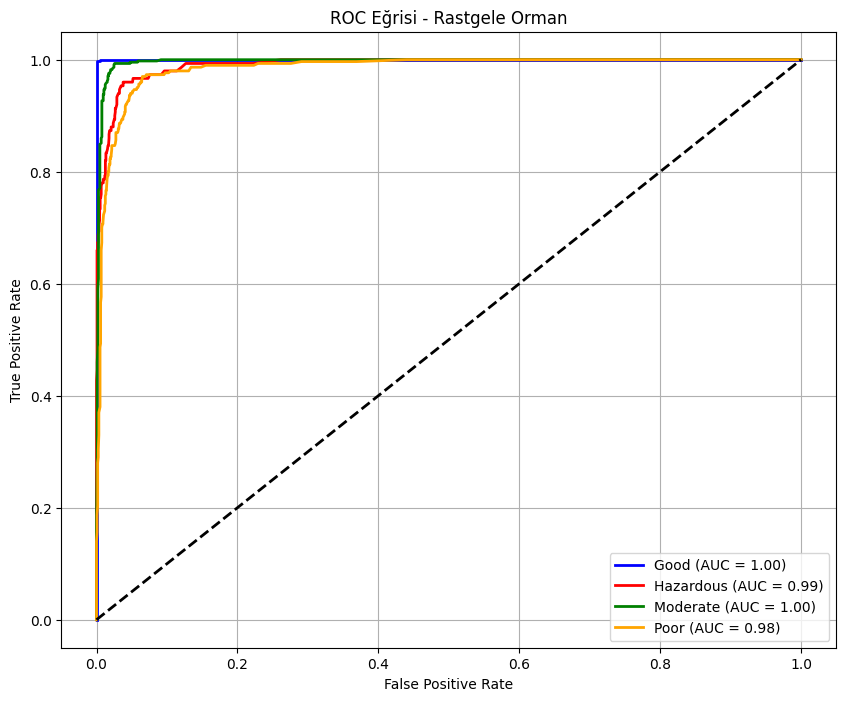


Rastgele Orman için sınıf bazlı AUC değerleri:
  Good: 1.0000
  Hazardous: 0.9908
  Moderate: 0.9966
  Poor: 0.9849

--- SVM ROC Eğrisi ---


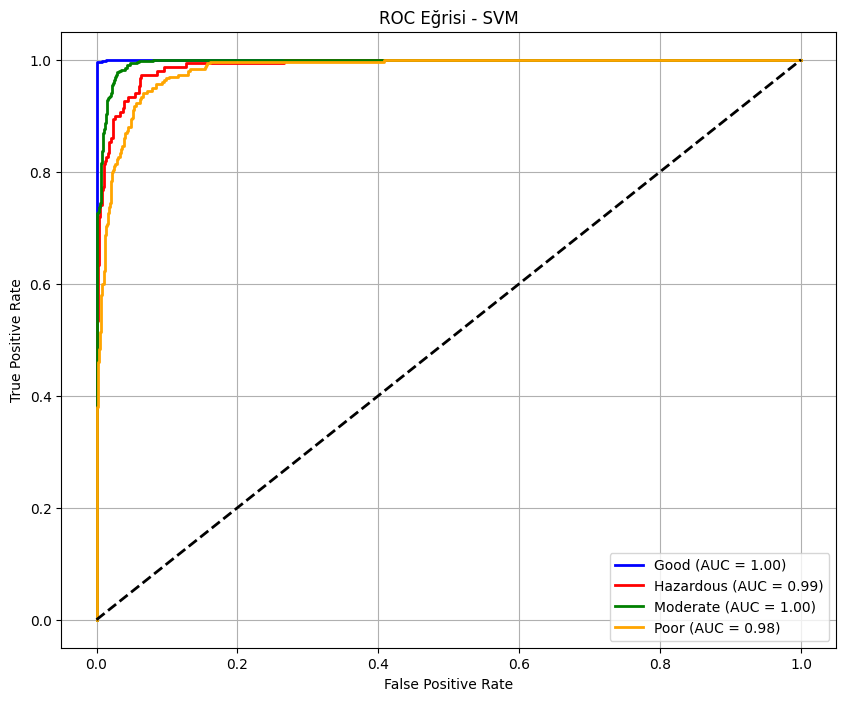


SVM için sınıf bazlı AUC değerleri:
  Good: 1.0000
  Hazardous: 0.9895
  Moderate: 0.9956
  Poor: 0.9819


In [6]:
# -*- coding: utf-8 -*-
# Hava Kalitesi ML Projesi - Sonuçların Grafiklerle Sunumu

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

# ==============================
# 1. Veri Yükleme ve Ön İşleme
# ==============================
try:
    df = pd.read_csv('air_quality_data.csv')
    print("✅ Veri seti başarıyla yüklendi!")

    label_encoder = LabelEncoder()
    df['Air Quality_Encoded'] = label_encoder.fit_transform(df['Air Quality'])

    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
    if 'Air Quality_Encoded' in numeric_cols:
        numeric_cols.remove('Air Quality_Encoded')
    scaler = StandardScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

    print("✅ Veri ön işleme tamamlandı.")
except FileNotFoundError:
    print("❌ Hata: 'air_quality_data.csv' bulunamadı.")
    exit()

X = df.drop(columns=['Air Quality', 'Air Quality_Encoded'])
y = df['Air Quality_Encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ==============================
# 2. ROC Eğrisi Çizim Fonksiyonu
# ==============================
def plot_multiclass_roc(clf, X_test, y_test, n_classes, model_name, label_encoder):
    y_score = clf.predict_proba(X_test)

    fpr, tpr, roc_auc = dict(), dict(), dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 8))
    colors = cycle(['blue', 'red', 'green', 'orange'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f"{label_encoder.inverse_transform([i])[0]} (AUC = {roc_auc[i]:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Eğrisi - {model_name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    print(f"\n{model_name} için sınıf bazlı AUC değerleri:")
    for i in range(n_classes):
        print(f"  {label_encoder.inverse_transform([i])[0]}: {roc_auc[i]:.4f}")

# ==============================
# 3. Rastgele Orman ROC Eğrisi
# ==============================
print("\n--- Rastgele Orman ROC Eğrisi ---")
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
rf_clf.fit(X_train, y_train)
plot_multiclass_roc(rf_clf, X_test, y_test, n_classes=4,
                    model_name='Rastgele Orman', label_encoder=label_encoder)

# ==============================
# 4. SVM ROC Eğrisi (CalibratedClassifierCV ile)
# ==============================
print("\n--- SVM ROC Eğrisi ---")
svm_clf = SVC(C=1, kernel='rbf', probability=True, random_state=42)
svm_clf.fit(X_train, y_train)
plot_multiclass_roc(svm_clf, X_test, y_test, n_classes=4,
                    model_name='SVM', label_encoder=label_encoder)


/tmp/ipython-input-163307974.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Model', y='F1-Skoru', data=df_skorlar, palette='viridis')


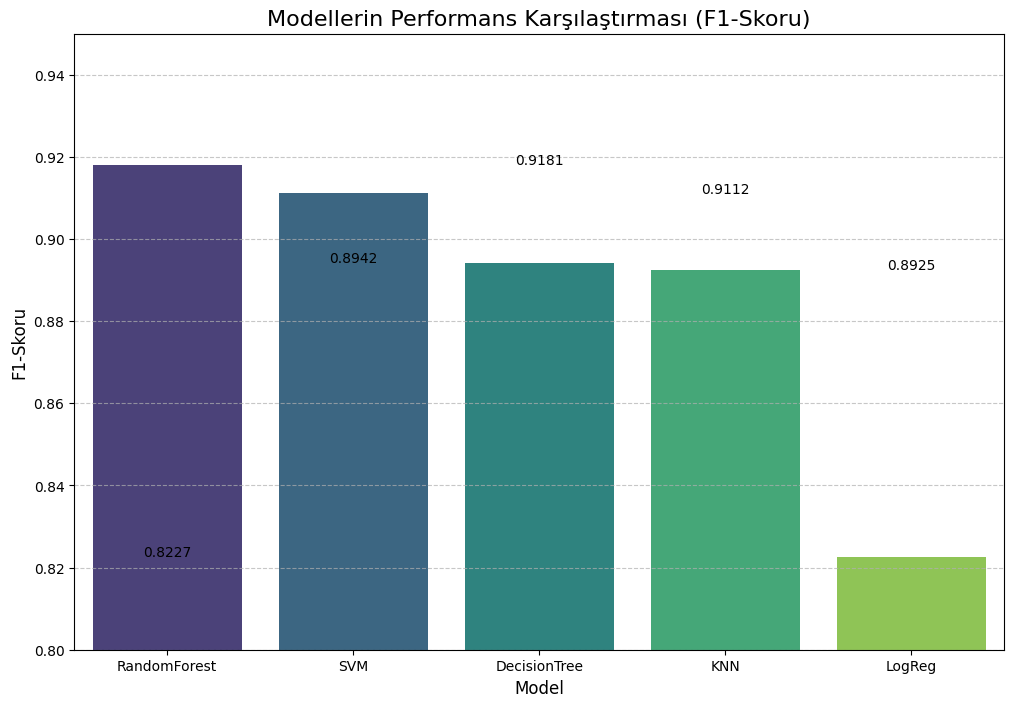


Grafik başarıyla oluşturuldu. Bu görseli sunumunuzda kullanabilirsiniz.


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Daha önce bulduğumuz model F1-skorları
# Bu değerler, projede yapılan model değerlendirme ve hiperparametre optimizasyonu sonucunda elde edilmiştir.
model_skorlari = {
    'Model': ['LogReg', 'DecisionTree', 'RandomForest', 'SVM', 'KNN'],
    'F1-Skoru': [0.8227, 0.8942, 0.9181, 0.9112, 0.8925]
}
df_skorlar = pd.DataFrame(model_skorlari)

# F1-skorlarına göre modelleri sırala
df_skorlar = df_skorlar.sort_values(by='F1-Skoru', ascending=False)

# Bar grafiğini oluştur
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Model', y='F1-Skoru', data=df_skorlar, palette='viridis')

# Başlıklar ve etiketler
plt.title('Modellerin Performans Karşılaştırması (F1-Skoru)', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('F1-Skoru', fontsize=12)

# Her çubuğun üzerine F1-skor değerini yazdır
for index, row in df_skorlar.iterrows():
    ax.text(row.name, row['F1-Skoru'], round(row['F1-Skoru'], 4), color='black', ha="center", fontsize=10)

# Y ekseninin görünümünü iyileştir
plt.ylim(0.80, 0.95)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Grafiği göster
plt.show()

print("\nGrafik başarıyla oluşturuldu. Bu görseli sunumunuzda kullanabilirsiniz.")